In [1]:
# numpy é uma biblioteca com ferramentas matemáticas e estatísticas
# pacote numérico usado na maioria das aplicações python

In [2]:
import numpy as np

In [3]:
minimo_inclusivo = 0 #inclusivo porque vamos considerar o '0'
maximo_exclusivo = 2 #exclusivo porque não vamos considerar o '2', apenas até o '2'
total_de_resultados = 50

In [4]:
r = np.random.randint(minimo_inclusivo,
                      maximo_exclusivo,
                      total_de_resultados) # colocamos dentro da variável 'r' uma lista de numeros que variam de 0 a 1
r
#pedimos que o 'r' tenha 50 valores diferentes

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0])

In [6]:
r[r == 1]
sum(r)

20

In [7]:
# em estatística, essa lista de 0 e 1 é uma distribuição binominal

In [8]:
%matplotlib inline
import seaborn as sns #pacote gráfico que deixa as coisas mais bonitas

In [116]:
# sobre o SEABORN: https://seaborn.pydata.org/generated/seaborn.regplot.html

In [9]:
resultado = np.random.randint(minimo_inclusivo,
                      maximo_exclusivo,
                      total_de_resultados)

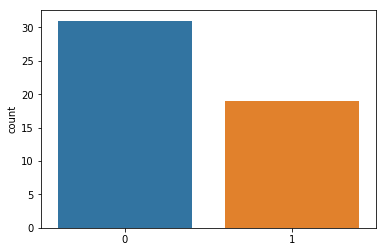

In [10]:
sns.countplot(resultado) #esse gráfico pega os resultados e agrupa

In [12]:
def contador_de_caras():
    resultado_das_jogadas = np.random.randint(0,2,50)
    somador = sum(resultado_das_jogadas)
    return somador
#'0' é o minimo inclusivo; '2' é o maximo exclusivo; 50 é o total de resultados 

In [13]:
contador_de_caras()

26

In [14]:
def simulador_jogadas_de_moeda(qtd_de_experimentos):
    qtd_caras = []
    for repeticao in range(qtd_de_experimentos):
        jogadas = contador_de_caras()
        qtd_caras.append(jogadas)
        
    return qtd_caras

In [16]:
#se voce definir que 'qtd_de_experimentos' é 10 e chamar a funcao, ele vai te retornar 10 amostras/10 numeros na lista

In [18]:
qtd_de_experimentos = 10

In [19]:
simulador_jogadas_de_moeda(qtd_de_experimentos)

[23, 23, 26, 26, 24, 27, 26, 20, 30, 30]

In [25]:
teste = simulador_jogadas_de_moeda(18)

In [26]:
teste

[18, 21, 25, 26, 27, 19, 28, 24, 32, 26, 17, 28, 21, 28, 21, 35, 26, 22]

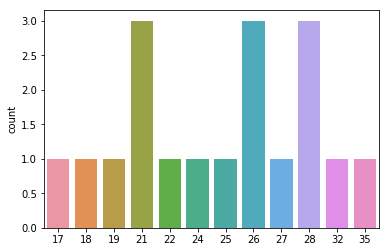

In [28]:
sns.countplot(teste)

In [38]:
# DESAFIO 
# como aumentar a chance de cair '25' vezes em um dos lados da moeda em 50 tentativas?

In [46]:
total_jogadas = 1000
simulador = simulador_jogadas_de_moeda(total_jogadas)
# ou seja, considerando mais jogadas, a probabilidade eh de cair metade das vezes 'cara' e metade das vezes 'coroa'

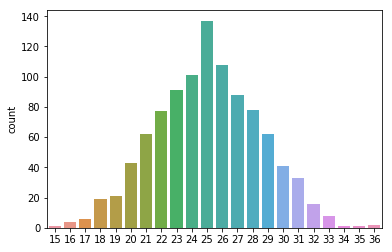

In [34]:
sns.countplot(simulador)

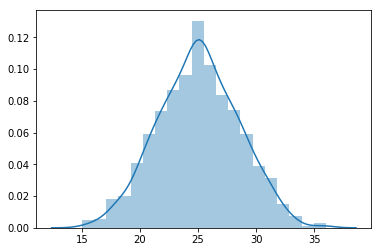

In [37]:
sns.distplot(simulador, bins=20) #essa eh uma outra forma de ver o conteudo de 'simulador' / mostra a distribuicao

In [40]:
# qual eh a probabilidade de aparecer menos de 20 vezes o lado 'cara' da moeda no simulador?


In [41]:
menor_20 = 0
for s in simulador:
    if(s < 20):
        menor_20 += 1
menor_20

49

In [47]:
regra_de_tres = (menor_20/(total_jogadas/100))
print("A probabilidade de cair um numero menor do que 20 é de", regra_de_tres, "%")

A probabilidade de cair um numero menor do que 20 é de 4.9 %


## Começamos a ver: métricas

In [48]:
import pandas as pd
titanic = pd.read_csv("titanic_2_aula.csv")

In [49]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange,AgeNotNull,AgeFillNa1,AgeFillNa-1,IdadeComMedia,IdadeComMediaSexo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,adulto,22.0,22.0,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,adulto,38.0,38.0,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,adulto,26.0,26.0,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,adulto,35.0,35.0,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,adulto,35.0,35.0,35.0,35.0,35.0


## Média aritmética
Soma de todos os valores e divisão pela quantidade de valores

In [50]:
titanic.Age.mean()

29.69911764705882

In [51]:
valores = [0,0,0,0,50]

In [55]:
def media(lista):
    return sum(lista)/len(lista)

In [56]:
media(valores)

10.0

In [61]:
# a média é fortemente influenciada por valores extremos

## Quartil / percentil

São medidas que dividem a amostra ordenada, por ordem crescente dos dados. 
O percentil é essa medida em 100 partes.

In [62]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [63]:
# Para pegarmos o PRIMEIRO QUARTIL ou PERCENTIL 25?

In [67]:
titanic.Age.quantile(0.25) # 25% das pessoas do titanic tinham 20.125 anos ou menos

20.125

In [65]:
titanic.Age.quantile() # o padrão é pegar sempre 50% ou o segundo quartil

28.0

In [66]:
titanic.Age.quantile(0.80)

41.0

# O percentil 50 também chamado de MEDIANA

#### Ele é muito usado para encontrar um valor central da sua distribuição. Não sofre impacto dos valores extremos.

In [68]:
titanic.Age.quantile(0.5)

28.0

In [69]:
# É o valor do meio em uma lista em ordem ascendente, se a quantidade de números for ímpar.
# Se for par, é a média dos números que estão no meio da lista.

In [70]:
par = [1, 10, 20, 1000]

In [72]:
np.median(par) # mediana

15.0

In [73]:
np.mean(par) # média

257.75

In [74]:
# Qual é a mediana da distribuição [1, 10, 20, 30]?

In [75]:
distribuicao = [1, 10, 20, 30]
np.median(distribuicao)

15.0

## BoxPlot

É um dos gráficos favoritos para analisar uma distribuicao. 
Ele pega os dados que apresentamos no describe() e exibe de forma gráfica.

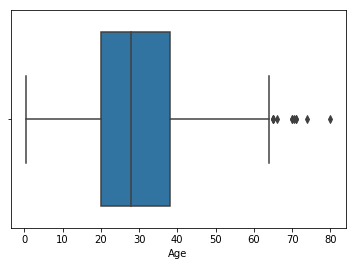

In [76]:
sns.boxplot(titanic.Age)

In [77]:
lista = [1,2,3,4,5,6,7,8,9,10,10,10,10,10,15,20]

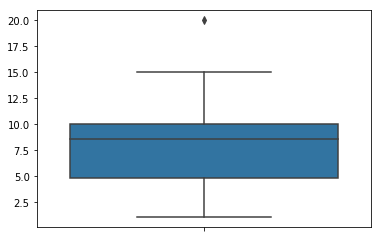

In [78]:
sns.boxplot(lista, orient="v") # v é de vertical

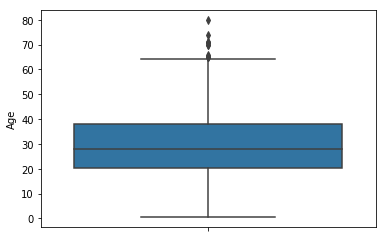

In [79]:
sns.boxplot(titanic.Age, orient="v")

In [80]:
# Desafio: crie um bloxplot com o resultado do simulador de jogadas!

In [84]:
# relembrando o conteuúdo da linha 46: definindo o parâmetro e chamando a função
total_jogadas = 1000
simulador = simulador_jogadas_de_moeda(total_jogadas)

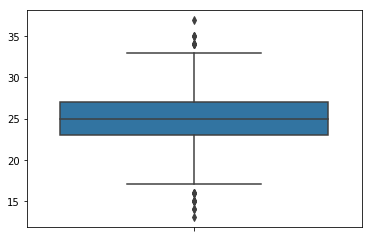

In [85]:
sns.boxplot(simulador, orient="v")

## SwarmPlot - serve para mostrar a incidência de valores

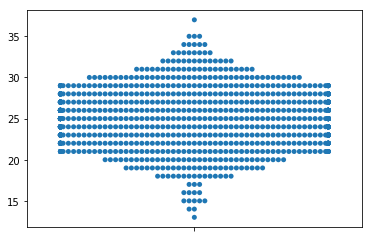

In [86]:
sns.swarmplot(simulador, orient="v")

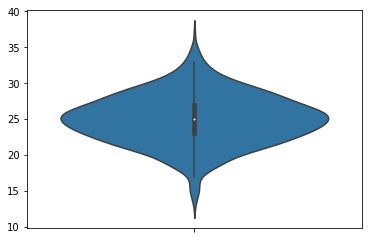

In [87]:
sns.violinplot(simulador, orient="v")

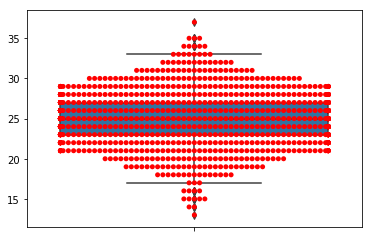

In [89]:
sns.boxplot(simulador, orient="v")
sns.swarmplot(simulador, orient="v", color="red")

## Nós também podemos gerar vários boxplots de uma só vez

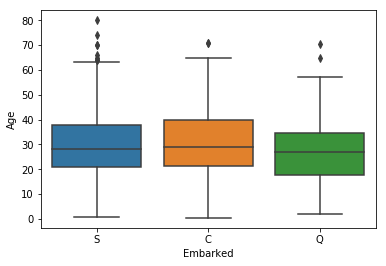

In [90]:
sns.boxplot(x=titanic.Embarked, y=titanic.Age)

## Gráfico de dispersão

O scatter plot usando seaborn pode ser feito de várias formas

*LMPLOT* ajuda o scatter plot tradicional com as retas de medição de uma regressão linear

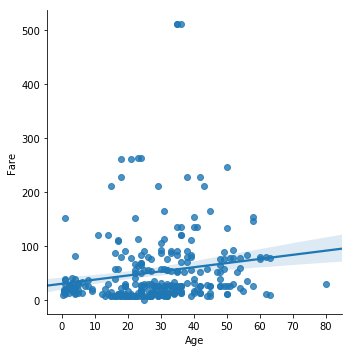

In [93]:
dados_com_vivos = titanic[titanic.Survived == 1]
sns.lmplot(x="Age", y="Fare", data=dados_com_vivos, fit_reg=True)

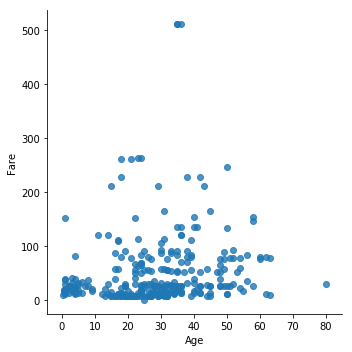

In [95]:
sns.lmplot(x="Age", y="Fare", data=dados_com_vivos, fit_reg=False) #sem a reta 

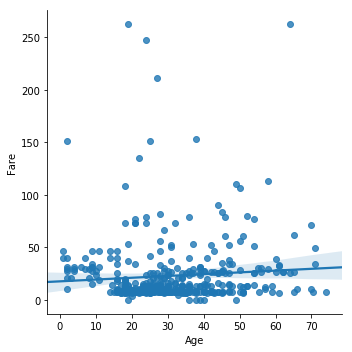

In [96]:
dados_com_mortos = titanic[titanic.Survived == 0]
sns.lmplot(x="Age", y="Fare", data=dados_com_mortos, fit_reg=True)

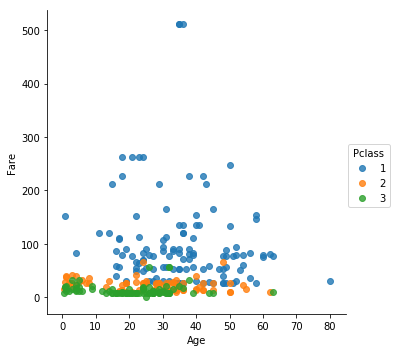

In [97]:
sns.lmplot(data=dados_com_vivos, x="Age", y="Fare", hue="Pclass", fit_reg=False)

In [98]:
# esse 'hue' identifica a classe em que cada passageiro estava.

# Métricas
## Moda - são os valores mais frequentes na distribuição

In [99]:
titanic.Age.mode()

0    24.0
dtype: float64

In [105]:
# ele retornou uma série que só tem um elemento, o'24'. é possível ter mais de uma moda, mais de um elemento.
# ou seja, mais de um valor com o número máximo de ocorrências.

In [106]:
titanic.Age.mode()[0] # esse é o primeiro e único elemento da nossa série com modas
# se outra idade também tivesse tantas ocorrências, ela seria outro elemento na nossa série.

24.0

In [110]:
titanic.Age.value_counts().head()

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64

In [111]:
titanic_media = titanic.Age.mean()
titanic_mediana = titanic.Age.median()
titanic_moda = titanic.Age.mode()

In [123]:
def assimetria(coluna):
    moda = coluna.mode()[0]
    mediana = coluna.median()
    media = coluna.mean()

    if (media > mediana > moda):
        return("assimetria positiva")
    elif (media < mediana < moda):
        return("assimetria negativa")
    else:
        return("simétrica")

In [124]:
assimetria(titanic.Age)

'assimetria positiva'

In [125]:
# para ver mais sobre isso: http://www.ebah.com.br/content/ABAAAes4EAL/assimetria-probabilidade-estastistica